
## Lendo uma imagem

In [ ]:
!pip install opencv-python

In [47]:
import cv2
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

In [61]:
BASE_PATH = '/home/italojs/black_images/page1.jpeg'
# BASE_PATH = '/home/italojs/black_images/page2.jpeg'

In [62]:
img = cv2.imread(BASE_PATH)
img.shape

(960, 1280, 3)

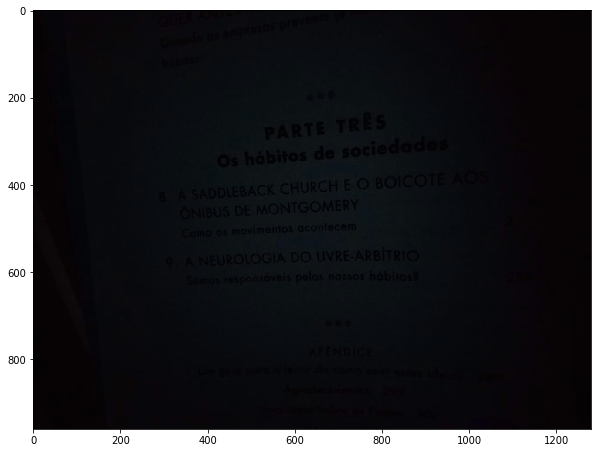

In [63]:
plt.figure(figsize=(10,20))
plt.imshow(img)

# Tratando nossa imagem

In [64]:
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscaled.shape

(960, 1280)

In [65]:
retval, threshold = cv2.threshold(grayscaled, 15, 255, cv2.THRESH_BINARY)

In [73]:
print(threshold)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Visualizando nossa imagem

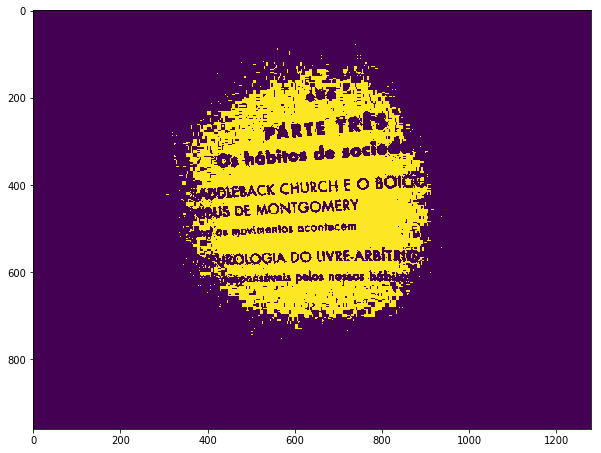

In [66]:
plt.figure(figsize=(10,20))
plt.imshow(threshold)

# Visualizando as camadas da nossa imagem RGB

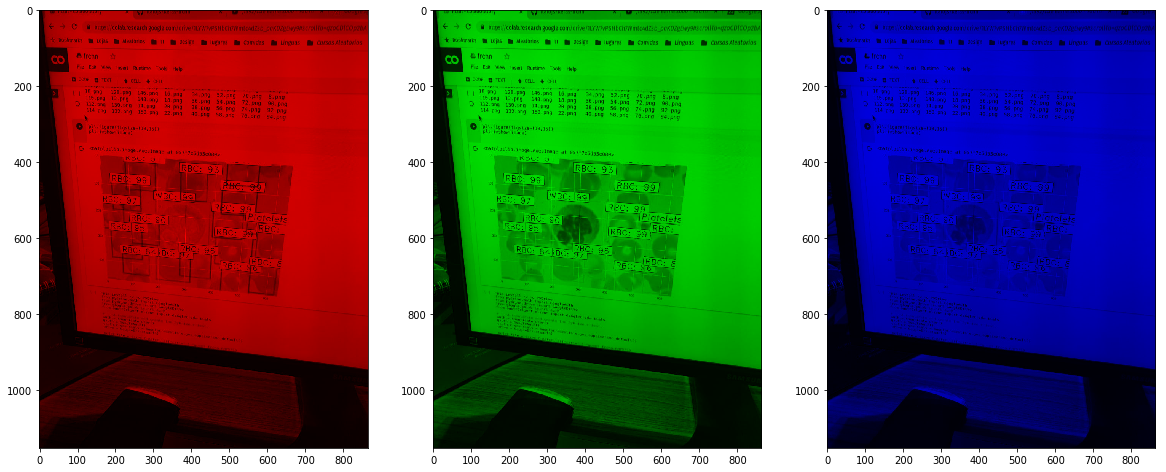

In [67]:
RBG_IMAGE = '/home/italojs/rgb.jpeg'
img_rgb = cv2.imread(RBG_IMAGE)

figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(20,15))

for i, subplot in zip(range(3), plots):
    temp = np.zeros(img_rgb.shape, dtype='uint8')
    temp[:,:,i] = img_rgb[:,:,i]
    subplot.imshow(temp)
plt.show()

### Recortando nossa imagem

In [68]:
t_y,b_y,l_x  = 210, 650, 190
cropped_image = threshold[t_y:b_y,l_x:]

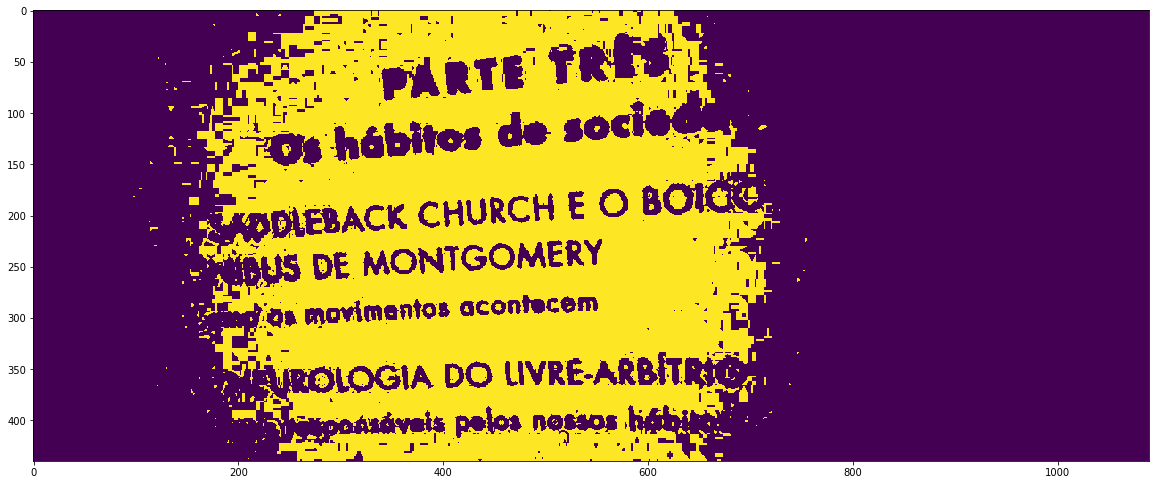

In [69]:
plt.figure(figsize=(20,20))
plt.imshow(cropped_image)

In [71]:
KEY = 'b0eb41fcc20b427c883112c1e6150220'
visionBaseUrl = 'https://brazilsouth.api.cognitive.microsoft.com/vision/v2.0/'
ocrUrl = visionBaseUrl + "ocr"

_, encoded_image = cv2.imencode('.png', cropped_image)
# _, encoded_image = cv2.imencode('.png', grayscaled)
# _, encoded_image = cv2.imencode('.png', img)

buffer = encoded_image.tobytes()
    
headers = {'Ocp-Apim-Subscription-Key': KEY,
        'Content-Type': 'application/octet-stream'}
params  = {'detectOrientation': 'true', 'language': 'pt'}

try:
    response = requests.post(ocrUrl, headers=headers, params=params, data=buffer)
    response.raise_for_status()

    analysis = response.json()
except Exception as e:
    raise Exception(e)
    
print(json.dumps(analysis, indent=2))

{
  "language": "pt",
  "textAngle": 0.05759586531581349,
  "orientation": "Up",
  "regions": [
    {
      "boundingBox": "233,96,394,275",
      "lines": [
        {
          "boundingBox": "299,96,292,37",
          "words": [
            {
              "boundingBox": "299,98,146,35",
              "text": "h\u00e1bitos"
            },
            {
              "boundingBox": "459,96,53,34",
              "text": "de"
            },
            {
              "boundingBox": "524,103,67,25",
              "text": "soc"
            }
          ]
        },
        {
          "boundingBox": "233,174,383,31",
          "words": [
            {
              "boundingBox": "233,175,133,30",
              "text": "NEBACK"
            },
            {
              "boundingBox": "377,176,134,28",
              "text": "CHURCH"
            },
            {
              "boundingBox": "525,176,16,28",
              "text": "E"
            },
            {
              "boundingBox":

In [72]:
line_infos = [region["lines"] for region in analysis["regions"]]
texts = []
for line in line_infos:
    for wordMetadata in line:
        for wordInfo in wordMetadata["words"]:
            texts.append(wordInfo["text"])

image_name = ' '.join(texts)
print(texts)

['hábitos', 'de', 'soc', 'NEBACK', 'CHURCH', 'E', 'O', 'B', 'DE', 'MONTGOMERY', 'movimentos', 'acontecem', 'LOGIA', 'DO', 'UVRE.ARBfT']
